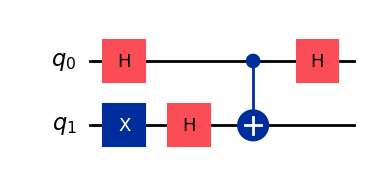

In [1]:
import qiskit
circuit = qiskit.QuantumCircuit(2)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.cx(0,1)
circuit.h(0)
circuit.draw('mpl')

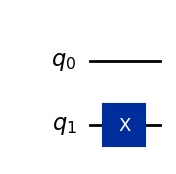

In [2]:
import qiskit
from qiskit.visualization import plot_histogram
import numpy as np

constant_oracle = qiskit.QuantumCircuit(2)
output = np.random.randint(2)

if output ==1:
    constant_oracle.x(1)

constant_oracle.draw('mpl') 

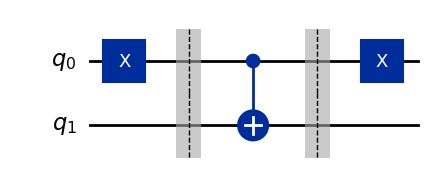

In [3]:
balanced_oracle = qiskit.QuantumCircuit(2)
balanced_oracle.x(0)
balanced_oracle.barrier()
balanced_oracle.cx(0,1)
balanced_oracle.barrier()
balanced_oracle.x(0)
balanced_oracle.draw('mpl')

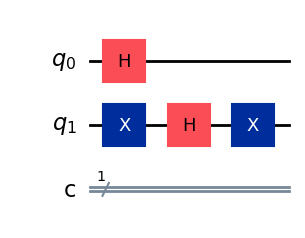

In [4]:
import qiskit

# initialize the imput qubits in state |+> and output qubit in |->
dj_circuit = qiskit.QuantumCircuit(2,1)
dj_circuit.h(0)  

dj_circuit.x(1)
dj_circuit.h(1) 

oracle_fn = constant_oracle
#oracle_fn = balanced_oracle
#dj_circuit = dj_circuit + oracle_fn
dj_circuit.compose(oracle_fn, inplace=True)
dj_circuit.draw('mpl')

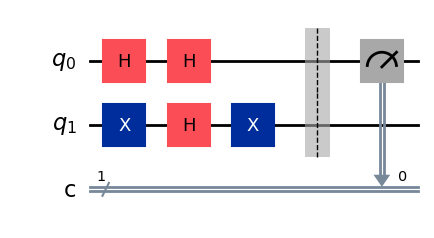

In [5]:
dj_circuit.h(0)
dj_circuit.barrier()
dj_circuit.measure(0, 0)  # Measure the first qubit
dj_circuit.draw('mpl') 

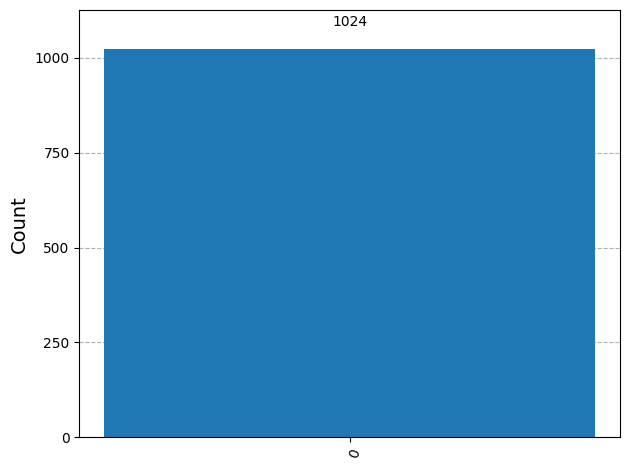

In [6]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')  
shots = 1024
compiled_circuit = qiskit.transpile(dj_circuit, backend) 
out = backend.run(compiled_circuit).result().get_counts()
plot_histogram(out)